In [20]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns

group = "dp_call"
variable = "phone_calls_rapids_incoming_meanduration_weekdays"


regressor = pd.read_csv(f"../../input/{group}_{variable}_regressor.csv")
regressor['group'] = regressor['Participant'].apply(lambda x: 'HC' if x.startswith('c') else 'SAD')
LSAS_regressor = pd.read_csv(f"../../input/gangnam_total_LSAS_regressor.csv")
HADS_depression_regressor = pd.read_csv(f"../../input/gangnam_total_HADS_depression_regressor.csv")

In [26]:
HADS_depression_regressor[f'HADS_depression_zscore'] = zscore(HADS_depression_regressor["HADS_depression"])

# z-score > 2.5인 값 필터링
outliers = HADS_depression_regressor[HADS_depression_regressor[f'HADS_depression_zscore'] > 2.5]

# 결과 출력
print(outliers)

    Participant  SEX  AGE  YR_EDU  HADS_depression  \
92        s0351    1   30    14.0             21.0   
117       s0498    1   19    12.0             19.0   

     Mean_Framewise_Displacement  HADS_depression_zscore  
92                       0.07164                2.943622  
117                      0.09987                2.521315  


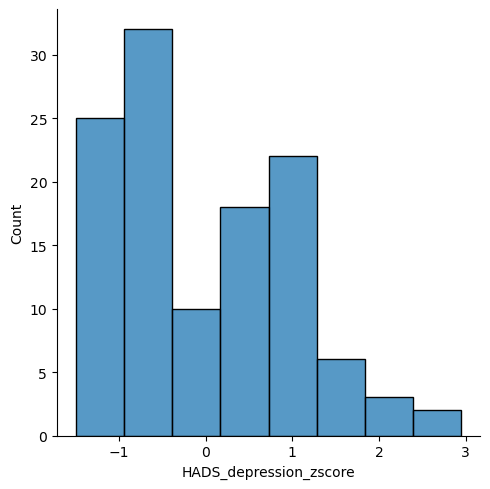

In [27]:
sns.displot(
    HADS_depression_regressor, 
    x=f'HADS_depression_zscore',
)